In [46]:
# 1. Import the library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.api.layers import Dense
from keras.api.layers import Dropout
from keras.api.optimizers import RMSprop
from keras.api.models import Sequential
from sklearn.model_selection import train_test_split


# Load Data

In [47]:
# input data
Input_data=pd.read_csv('Input_data.csv')
Input_data.head()


,Ps3fcG1,Ps3fcG2,Ps3fcG3,Ps3fcG4,Ps3fcG5,Ps3fcG6,Ps3fcG7,Ps3fcG8,Ps3fcG9,Ps3fcG10,...,Ps9ffG21,Ps9ffG22,Ps9ffG23,Ps9ffG24,Ps9ffG25,Ps9ffG26,Ps9ffG27,Ps9ffG28,Ps9ffG29,Ps9ffG30
0,10.438953,6.621408,15.512871,15.512871,13.693546,13.975908,13.471690,15.512871,15.512871,15.512871,...,0.575355,12.132656,1.444133,1.710315,0.451781,1.017509,8.190730,10.839517,9.059296,1.064068
1,11.259718,7.665346,16.596429,16.596429,14.859346,15.136680,14.605864,16.596429,16.596429,16.596429,...,1.055984,13.932537,2.453564,2.901455,1.198477,1.621544,9.895569,12.330541,10.497167,1.899273
2,12.077376,8.698430,17.661146,17.661146,16.016358,16.287128,15.730693,17.661146,17.661146,17.661146,...,1.566786,15.724604,3.479512,4.115427,1.980541,2.259260,11.603132,13.820962,11.932098,2.760353
3,12.888141,9.712615,18.693392,18.693392,17.154518,17.416187,16.834322,18.693392,18.693392,18.693392,...,2.136634,17.500595,4.530634,5.365726,2.821064,2.958511,13.311362,15.308339,13.361190,3.662340
4,13.687643,10.703932,19.687194,19.687194,18.262741,18.512821,17.901983,19.687194,19.687194,19.687194,...,2.790481,19.251885,5.608416,6.655588,3.727652,3.738065,15.014459,16.788904,14.783655,4.609589


In [48]:
#target_data
Target_data=pd.read_csv('Target_data.csv')
Target_data.head()

,Ks3fcG1,Ks3fcG2,Ks3fcG3,Ks3fcG4,Ks3fcG5,Ks3fcG6,Ks3fcG7,Ks3fcG8,Ks3fcG9,Ks3fcG10,...,Ks9ffG21,Ks9ffG22,Ks9ffG23,Ks9ffG24,Ks9ffG25,Ks9ffG26,Ks9ffG27,Ks9ffG28,Ks9ffG29,Ks9ffG30
0,172.772245,166.602443,164.839168,155.035174,155.279578,164.272203,166.669603,165.299995,164.367751,164.538314,...,163.026424,161.957064,159.591205,165.195376,159.328296,162.813213,160.765217,165.595983,160.834960,159.928503
1,173.454094,167.022569,165.664498,156.009940,155.988289,165.040986,167.264042,165.990703,165.276946,164.843532,...,164.745365,163.739006,161.707100,166.613816,160.950962,164.311003,162.563730,166.651040,162.462512,162.002078
2,174.101315,167.403776,166.470852,156.977872,156.676149,165.780648,167.819217,166.651572,166.136958,165.144585,...,166.356301,165.508693,163.720700,167.930650,162.554776,165.720240,164.247216,167.604838,164.073337,164.009052
3,174.681692,167.708718,167.229078,157.924367,157.319401,166.454704,168.298102,167.251514,166.907440,165.422582,...,167.781483,167.219687,165.554004,169.074835,164.083297,166.973237,165.734544,168.383610,165.618301,165.875947
4,175.172515,167.912020,167.902443,158.821426,157.897158,167.025639,168.675393,167.764688,167.568059,165.647396,...,168.979757,168.781648,167.157132,170.013189,165.432390,168.025674,166.985536,168.946023,167.007497,167.537680


In [49]:
# 3. Pre-processing data
# 3.1 Convert data to array
Input_arr = np.array(Input_data)
Target_arr = np.array(Target_data)


In [50]:
# 3.2 Transpose the matrix
Input_tranp = np.transpose(Input_arr)
Target_tranp = np.transpose(Target_arr)


In [51]:
# 4. Normalize the data
# 4.1 formula to normalize
def norm(x):
    return (x - x.min()) / (x.max() - x.min())

Input_norm = norm(Input_tranp)


In [52]:
# 5 Label the target output
# 5.1 formula to label the target output
def label(y):
    z = (y - y.min())
    return np.round(z)
Target_tranp = label(Target_tranp)

In [53]:
# 6 Split data 80% for train and 20% for validation
Input_trai, Input_valid, Target_trai, Target_valid = train_test_split(Input_norm, Target_tranp, test_size=0.2)

In [89]:
# 7. Create deep learning model
ann_Model_1 = Sequential([
        Dense(units=250, input_dim=Input_trai.shape[1], activation='sigmoid'),
        Dense(units=250, activation='relu'),
        Dense(Target_trai.shape[1], activation='elu')
    ])
ann_Model_2 = Sequential([
        Dense(units=250, input_dim=Input_trai.shape[1], activation='sigmoid'),
        Dropout(0.1),
        Dense(units=250, activation='relu'),
        Dropout(0.1),
        Dense(Target_trai.shape[1], activation='elu')
    ])
ann_Model_3 = Sequential()
ann_Model_3.add(Dense(units=250, input_dim=Input_trai.shape[1], activation='sigmoid'))
ann_Model_3.add(Dropout(0.1))
ann_Model_3.add(Dense(units=250, activation='relu'))
ann_Model_3.add(Dropout(0.1))
ann_Model_3.add(Dense(Target_trai.shape[1], activation='elu'))

/Users/uonchamroeun/PyCharmMiscProject/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
# Check model property
print(ann_Model_1.summary())
print(ann_Model_2.summary())
print(ann_Model_3.summary())


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                │ (None, 250)            │        25,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 250)            │        62,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 100)            │        25,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,100 (441.80 KB)

 Trainable params: 113,100 (441.80 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                │ (None, 250)            │        25,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 250)            │        62,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 100)            │        25,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,100 (441.80 KB)

 Trainable params: 113,100 (441.80 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                │ (None, 250)            │        25,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 250)            │        62,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 100)            │        25,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,100 (441.80 KB)

 Trainable params: 113,100 (441.80 KB)

 Non-trainable params: 0 (0.00 B)

None


In [86]:
# 8. compile and train model
ann_Model_1.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=0.007), metrics=['accuracy'])
#Train Model
history = ann_Model_1.fit(Input_trai, Target_trai, validation_data=(Input_valid, Target_valid), batch_size=10, epochs=150, verbose = 2)


Epoch 1/150
24/24 - 0s - 15ms/step - accuracy: 0.0500 - loss: 312.2673 - val_accuracy: 0.0167 - val_loss: 122.0694
Epoch 2/150
24/24 - 0s - 2ms/step - accuracy: 0.0500 - loss: 82.4707 - val_accuracy: 0.0167 - val_loss: 57.7347
Epoch 3/150
24/24 - 0s - 2ms/step - accuracy: 0.0583 - loss: 91.9235 - val_accuracy: 0.0333 - val_loss: 50.3007
Epoch 4/150
24/24 - 0s - 3ms/step - accuracy: 0.0458 - loss: 93.6487 - val_accuracy: 0.0333 - val_loss: 49.5053
Epoch 5/150
24/24 - 0s - 3ms/step - accuracy: 0.0500 - loss: 80.5079 - val_accuracy: 0.0500 - val_loss: 152.0972
Epoch 6/150
24/24 - 0s - 3ms/step - accuracy: 0.0458 - loss: 91.3637 - val_accuracy: 0.0500 - val_loss: 149.6540
Epoch 7/150
24/24 - 0s - 3ms/step - accuracy: 0.0542 - loss: 76.3721 - val_accuracy: 0.0333 - val_loss: 65.8853
Epoch 8/150
24/24 - 0s - 3ms/step - accuracy: 0.0542 - loss: 75.0891 - val_accuracy: 0.0333 - val_loss: 69.1832
Epoch 9/150
24/24 - 0s - 3ms/step - accuracy: 0.0458 - loss: 69.9934 - val_accuracy: 0.0167 - val_l

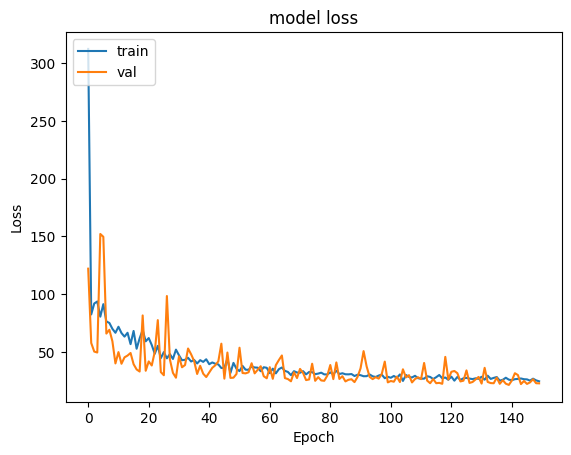

In [87]:
# 9. visualize loss in deep learning
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


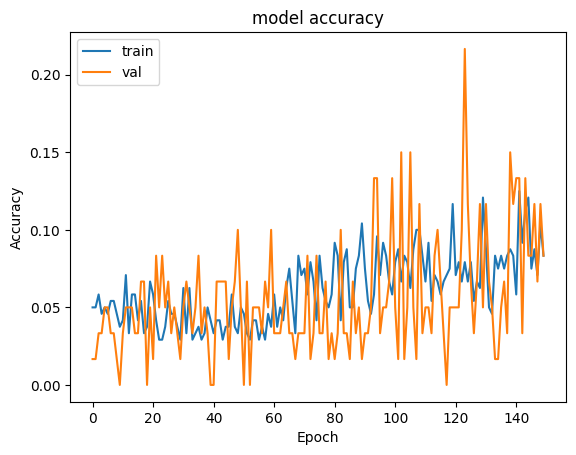

In [88]:
# 10. visualize accuracy in deep learning
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [83]:
# 11. save the models
ann_Model_1.save('w5_ImplementationANN_1.keras')

# 12. check the performance of model with actual output and predict output
